
<div style="border:solid navy 2px; padding: 20px">

<h1 style="color:navy; margin-bottom:20px">Задача</h1>

Подготовить исследование рынка по имеющимся данным о заведениях общественного питания в Москве.

</div>



In [1]:
#!pip install plotly

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy import stats as st
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
from plotly import graph_objects as go

import json
import requests

import re


<div style="border:solid navy 2px; padding: 20px">
    Функция для создания графика bar
</div>



In [3]:
def draw_bar (table, colx, coly, title_text, xlabel, ylabel):
    
    table[colx] = table[colx].astype(str)
    x = table[colx]
    y = table[coly]

    fig, ax = plt.subplots()

    ax.bar(x, y, align='center', width= 0.6, color='navy', alpha=0.8)

    fig.set_figwidth(10)
    fig.set_figheight(7)

    for i in range(len(table[colx])):
        plt.text(x= table.loc[i,colx], y=table.loc[i,coly]+0.01*table.loc[i,coly], 
                 s=table.loc[i,coly],horizontalalignment='center', color='navy', size = 15)
   
    plt.title(title_text, fontsize='17')
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if len(table[colx]) > 3:
        plt.xticks(horizontalalignment='right', rotation=45)
    
    return(plt.show())

<div style="border:solid navy 2px; padding: 20px">
    Функция для создания графика распределения
</div>


In [4]:
def draw_scatter(col, title_text, x_label='Порядковый номер объекта', y_label='Количество'):
    x_values = pd.Series(range(0,len(col)))
    plt.scatter(x_values, col)

    plt.suptitle(title_text, size = 17)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    print('Минимум -', (col.min()).astype(int))
    print('Максимум -', (col.max()).astype(int))
    print('Среднее -', int(round(col.mean())))
    print('Медиана -', int(round(col.median())))
    return(plt.show())


<div style="border:solid navy 2px; padding: 20px">
    Функция для создания графика bar по двум столбцам
</div>

In [5]:
def draw_bar_pair (col1, col2, x_names, title_text, x_label, y_label, legend_text):
    f, ax = plt.subplots(figsize=(10,5))

    bars1 = col1
    bars2 = col2

    names = x_names.to_list()
    width = 0.35
    x = np.arange(len(names)) 

    plt.bar(x - width/2, bars1, width, alpha=0.7)

    plt.bar(x + width/2,  bars2, width, alpha=0.7)

    plt.title(title_text, size = 17)
    plt.xticks([r for r in range(len(bars1))], names, horizontalalignment='right', rotation=45)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    ax.legend(legend_text)

    return(plt.show())

<div style="border:solid navy 2px; padding: 20px">
    Функция для создания графика boxplot
</div>

In [6]:
def draw_boxplot(col_x, col_y, title_text):
    sns.boxplot( x=col_x, y=col_y)
    
    if len(col_x.unique())>4:
        plt.xticks(horizontalalignment='right', rotation=45)
    plt.suptitle(title_text, size = 17)
    return(plt.show())


In [8]:
df_crude = pd.read_csv('/Users/Alexander/Desktop/Juli_bag/Project_9_Moscow/rest_data.csv')

In [10]:
df_crude.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50



<div style="border:solid navy 2px; padding: 20px">

<h2 style="color:navy; margin-bottom:20px">Предобработка данных</h2>

</div>



In [11]:
df_crude.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [12]:
df_crude.duplicated().sum() # Количество дубликатов

0

In [13]:
df_crude.isnull().sum() # Количесво нулевых значений

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

In [14]:
df_crude.columns

Index(['id', 'object_name', 'chain', 'object_type', 'address', 'number'], dtype='object')

In [15]:
for col in ['id', 'number']:
    print(df_crude[col].name)
    print(df_crude[col].describe())
    print()

id
count     15366.000000
mean     119720.066901
std       73036.130732
min         838.000000
25%       28524.000000
50%      144974.500000
75%      184262.250000
max      223439.000000
Name: id, dtype: float64

number
count    15366.000000
mean        59.547182
std         74.736833
min          0.000000
25%         12.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64




<div style="border:solid navy 2px; padding: 20px">

<h3 style="color:navy"> Обработка значений - количества посадочных мест </h3>

</div>



Минимум - 0
Максимум - 1700
Среднее - 60
Медиана - 40


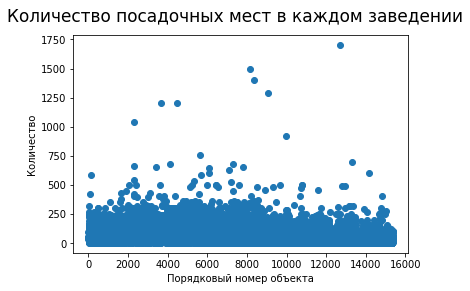

In [16]:
draw_scatter(df_crude['number'],'Количество посадочных мест в каждом заведении')


<div style="border:solid navy 2px; padding: 20px">
Обработка нулевых значений в number (количество посадочных мест)
</div>

In [17]:
number_0 = df_crude[df_crude['number']==0] 
print('Количество строк с нулевыми значениями в number -', number_0.shape[0])

Количество строк с нулевыми значениями в number - 1621


In [18]:
# типы заведений с 0
number_0['object_type'].unique()

array(['закусочная', 'предприятие быстрого обслуживания', 'столовая',
       'кафетерий', 'кафе', 'магазин (отдел кулинарии)', 'буфет', 'бар',
       'ресторан'], dtype=object)

In [19]:
# для типов из списка  нулей быть не должно
number_0_bad = number_0[number_0['object_type'].isin(['столовая', 'бар', 'кафе', 
                                                      'ресторан', 'кафетерий'])]

print('Количество строк в таблице -',number_0_bad.shape[0])
number_0_bad.head()

Количество строк в таблице - 515


,id,object_name,chain,object_type,address,number
206,150836,ГБОУ Школа №1468,нет,столовая,"город Москва, Волгоградский проспект, дом 17, ...",0
504,157035,Кофе с собой,да,кафетерий,"город Москва, Краснохолмская набережная, дом 1...",0
577,149220,Кофейня «Кофе Хаус»,да,кафе,"город Москва, Павелецкая площадь, дом 1А, стро...",0
802,142581,Кофе Энигма,нет,кафе,"город Москва, Овчинниковская набережная, дом 2...",0
1003,149427,Французская пекарня,нет,кафетерий,"город Москва, Русаковская улица, дом 29",0


In [20]:
# исключаю из df строки с 0, для подсчета среднего зачения, для замены нулей
data = df_crude[~df_crude.index.isin(number_0_bad.index)]
print('Количество строк в таблице -',data.shape[0])
data.head()

Количество строк в таблице - 14851


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [21]:
df_list_type = data.groupby('object_type', as_index=False).agg({'number':'median'})
df_list_type

,object_type,number
0,бар,35.0
1,буфет,32.0
2,закусочная,0.0
3,кафе,35.0
4,кафетерий,9.0
5,магазин (отдел кулинарии),0.0
6,предприятие быстрого обслуживания,5.0
7,ресторан,80.0
8,столовая,104.5


In [22]:
# группирую по типу объекта
df_list_type = data.groupby('object_type', as_index=False).agg({'number':'median'})
df_list_type.columns=['object_type', 'median_number']

In [23]:
df_list_type

,object_type,median_number
0,бар,35.0
1,буфет,32.0
2,закусочная,0.0
3,кафе,35.0
4,кафетерий,9.0
5,магазин (отдел кулинарии),0.0
6,предприятие быстрого обслуживания,5.0
7,ресторан,80.0
8,столовая,104.5


In [24]:
# заменяю нули в промежуточной таблице
number_0_bad = number_0_bad.join(df_list_type[['object_type', 'median_number']].
                                 set_index('object_type'), on='object_type')


In [25]:
print('Количество строк в таблице -',number_0_bad.shape[0])
number_0_bad.head()

Количество строк в таблице - 515


,id,object_name,chain,object_type,address,number,median_number
206,150836,ГБОУ Школа №1468,нет,столовая,"город Москва, Волгоградский проспект, дом 17, ...",0,104.5
504,157035,Кофе с собой,да,кафетерий,"город Москва, Краснохолмская набережная, дом 1...",0,9.0
577,149220,Кофейня «Кофе Хаус»,да,кафе,"город Москва, Павелецкая площадь, дом 1А, стро...",0,35.0
802,142581,Кофе Энигма,нет,кафе,"город Москва, Овчинниковская набережная, дом 2...",0,35.0
1003,149427,Французская пекарня,нет,кафетерий,"город Москва, Русаковская улица, дом 29",0,9.0


In [26]:
number_0_bad['number'].replace(0, number_0_bad['median_number'], inplace=True)
number_0_bad.head()

,id,object_name,chain,object_type,address,number,median_number
206,150836,ГБОУ Школа №1468,нет,столовая,"город Москва, Волгоградский проспект, дом 17, ...",104.5,104.5
504,157035,Кофе с собой,да,кафетерий,"город Москва, Краснохолмская набережная, дом 1...",9.0,9.0
577,149220,Кофейня «Кофе Хаус»,да,кафе,"город Москва, Павелецкая площадь, дом 1А, стро...",35.0,35.0
802,142581,Кофе Энигма,нет,кафе,"город Москва, Овчинниковская набережная, дом 2...",35.0,35.0
1003,149427,Французская пекарня,нет,кафетерий,"город Москва, Русаковская улица, дом 29",9.0,9.0


In [27]:
number_0_bad.columns

Index(['id', 'object_name', 'chain', 'object_type', 'address', 'number',
       'median_number'],
      dtype='object')

In [28]:
number_0_bad = number_0_bad[['id', 'object_name', 'chain', 'object_type', 'address', 'number']]
number_0_bad.head()

,id,object_name,chain,object_type,address,number
206,150836,ГБОУ Школа №1468,нет,столовая,"город Москва, Волгоградский проспект, дом 17, ...",104.5
504,157035,Кофе с собой,да,кафетерий,"город Москва, Краснохолмская набережная, дом 1...",9.0
577,149220,Кофейня «Кофе Хаус»,да,кафе,"город Москва, Павелецкая площадь, дом 1А, стро...",35.0
802,142581,Кофе Энигма,нет,кафе,"город Москва, Овчинниковская набережная, дом 2...",35.0
1003,149427,Французская пекарня,нет,кафетерий,"город Москва, Русаковская улица, дом 29",9.0


In [29]:
# Объединяю с основным df
df = pd.concat([data, number_0_bad])
df.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48.0
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35.0
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95.0
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40.0
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50.0


In [30]:
# Проверяю, что количество 0 стало меньше на 515

print('Количество строк в таблице -',df[df['number']==0].shape[0])
df[df['number']==0].head()

Количество строк в таблице - 1106


,id,object_name,chain,object_type,address,number
137,115498,Пекарня & Донер,нет,закусочная,"город Москва, Бутырская улица, дом 9, корпус 2",0.0
154,152556,Шаурма в пите,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0.0
157,149568,Суши,нет,предприятие быстрого обслуживания,"город Москва, улица Маршала Василевского, дом ...",0.0
190,126956,"Шаурма, куры-гриль",нет,предприятие быстрого обслуживания,"город Москва, 1-я Владимирская улица, дом 21",0.0
195,149531,"Шаурма, куры-гриль",нет,предприятие быстрого обслуживания,"город Москва, 2-я Владимирская улица, дом 44/10",0.0



<div style="border:solid navy 2px; padding: 20px">

Встречаются очень большие значения, но они реальны. 1621 заведение не имеет посадочных мест - это тоже реалистичные данные для предприятий быстрого обслуживания и магазинов (отдел кулинарии), но не для ресторанов, кафе, баров, столовых, кафетериев. 

Почитала ГОСТ, четких требований к количеству посадочных мест не нашла, буду ориентироваться на требования к наличию зала для посетителей. Про закусочные встречается информация о возможности отсутствия посадочных мест (можно использовать высокие столы).

515 записей с заведениями, предполагающими наличие посадочных мест, но с нулевыми значениями - скорее всего данные не достоверны (возможно, не указали при заполнении базы). Заменила количество посадочных мест на среднее для типа заведения.

</div>


<div style="border:solid navy 2px; padding: 20px">

<h3 style="color:navy"> Обработка столбцов с нечисловыми значениями </h3>

</div>



In [31]:
for col in ['object_name', 'chain', 'object_type', 'address']:
    print(df[col].name, ' - ',len(df[col].unique()), 'уникальных значений')
    print(df[col].unique())
    
    print()

object_name  -  10393 уникальных значений
['СМЕТАНА' 'Родник' 'Кафе «Академия»' ... 'CoffeeShop' 'Movenpick'
 'Marmalato']

chain  -  2 уникальных значений
['нет' 'да']

object_type  -  9 уникальных значений
['кафе' 'столовая' 'закусочная' 'предприятие быстрого обслуживания'
 'ресторан' 'кафетерий' 'буфет' 'бар' 'магазин (отдел кулинарии)']

address  -  9108 уникальных значений
['город Москва, улица Егора Абакумова, дом 9'
 'город Москва, улица Талалихина, дом 2/1, корпус 1'
 'город Москва, Абельмановская улица, дом 6' ...
 'город Москва, город Московский, Радужная улица, дом 14, корпус 2'
 'город Москва, улица 8 Марта, дом 8, корпус 1'
 'город Москва, улица Генерала Белова, дом 59']




<div style="border:solid navy 2px; padding: 20px">

Меняю тип столбца с логическими значениями на bool.

В столбце object_name встречаются частично повторяющиеся названия заведений.

</div>



In [32]:
df['chain'] = df['chain'].replace('да', 1)
df['chain'] = df['chain'].replace('нет', 0)

df['chain'] = df['chain'].astype('bool')

In [33]:
df['chain'].head()

0    False
1    False
2    False
3     True
4    False
Name: chain, dtype: bool


<div style="border:solid navy 2px; padding: 20px">

<h2 style="color:navy; margin-bottom:20px">Анализ данных</h2>

</div>



<div style="border:solid navy 2px; padding: 20px">
    Исследуйте соотношение видов объектов общественного питания по количеству. Постройте график.
</div>

In [34]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48.0
1,77874,Родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35.0
2,24309,Кафе «Академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95.0
3,21894,ПИЦЦЕТОРИЯ,True,кафе,"город Москва, Абрамцевская улица, дом 1",40.0
4,119365,Кафе «Вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50.0


In [35]:
df_type = df.groupby('object_type')['id'].count().reset_index()
df_type.columns = ['object_type', 'count_id']
df_type = df_type.sort_values('count_id', ascending=False)
df_type

,object_type,count_id
3,кафе,6099
8,столовая,2587
7,ресторан,2285
6,предприятие быстрого обслуживания,1923
0,бар,856
1,буфет,585
4,кафетерий,398
2,закусочная,360
5,магазин (отдел кулинарии),273


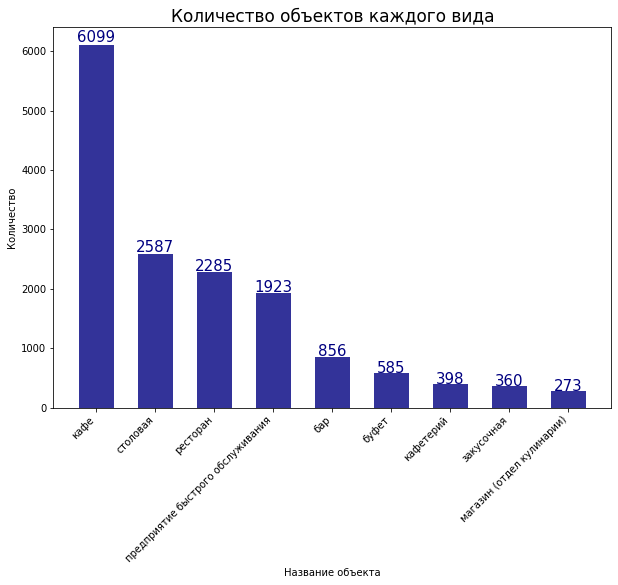

In [36]:
draw_bar(df_type, 'object_type', 'count_id', 
         'Количество объектов каждого вида', 'Название объекта', 'Количество')

<div style="border:solid navy 2px; padding: 20px">
    Исследуйте соотношение сетевых и несетевых заведений по количеству. Постройте график.
</div>

In [37]:
df_chain = df.groupby('chain')['id'].count().reset_index()
df_chain

,chain,id
0,False,12398
1,True,2968


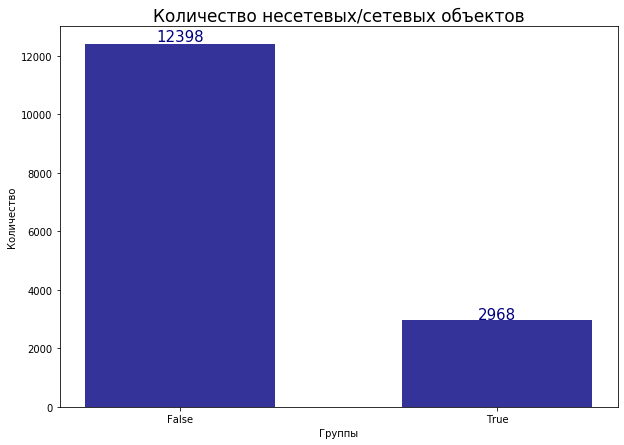

In [38]:
draw_bar(df_chain, 'chain', 'id', 'Количество несетевых/сетевых объектов', 'Группы', 'Количество')

<div style="border:solid navy 2px; padding: 20px">
    Для какого вида объекта общественного питания характерно сетевое распространение?
</div>

In [39]:
df_type_chain = df.groupby(['object_type', 'chain'])['id'].count().reset_index()

In [40]:
df_type_true = df_type_chain[df_type_chain['chain']==True]
df_type_false = df_type_chain[df_type_chain['chain']==False]
df_type_chain = df_type_true.merge(df_type_false, suffixes=('_t', '_f'), 
                                   how='outer', on = 'object_type')

In [41]:
# Нахожу долю сетевых объектов от всех объектов для каждого типа
df_type_chain['chain_part'] = (df_type_chain['id_t']/
                               (df_type_chain['id_t']+df_type_chain['id_f'])).round(2)
df_type_chain[['object_type', 'chain_part']]

,object_type,chain_part
0,бар,0.04
1,буфет,0.02
2,закусочная,0.16
3,кафе,0.23
4,кафетерий,0.13
5,магазин (отдел кулинарии),0.29
6,предприятие быстрого обслуживания,0.41
7,ресторан,0.24
8,столовая,0.00


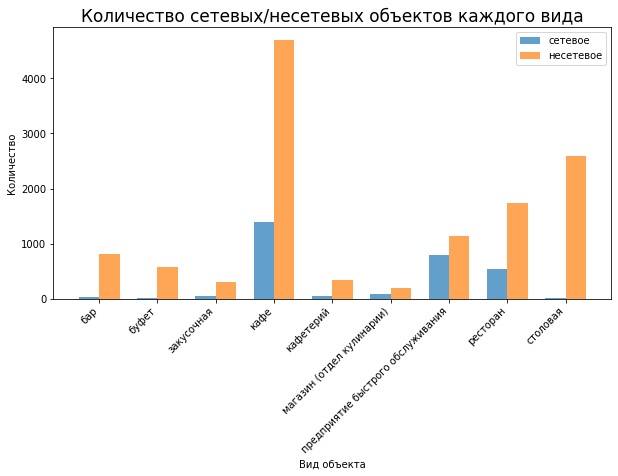

In [42]:
draw_bar_pair(df_type_chain['id_t'], df_type_chain['id_f'], df_type_chain['object_type'], 
              'Количество сетевых/несетевых объектов каждого вида', 'Вид объекта', 'Количество', 
              ['сетевое', 'несетевое'])


<div style="border:solid navy 2px; padding: 20px">
Наиболее равномерно распределение "сетевой/несетевой объект" выглядит у предприятий быстрого обслуживания - 41%.
</div>




<div style="border:solid navy 2px; padding: 20px">
Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?
</div>



In [43]:
df['object_name'] = df['object_name'].str.lower()


<div style="border:solid navy 2px; padding: 20px">
При прочтении названий выделила лишние слова
</div>



In [44]:
bad = ['точка продажи готовой еды ', 'бар ', 'кальян-бар ', 'бб ', 'анти-кафе ', 'закусочная ', 
       'лаундж-бар ', 'чешская пивная ', 'семейное кафе ', 'японский ресторан ', 'ресторан ', 
       'фитнес-бар ', 'суши ', 'семейное кафе и кондитерская ', 'предприятие быстрого питания ',
       'предприятие быстрого обслуживания ', 'пиццерия ', 'пбо ', 'магазин готовой еды ',
       'кофейня ', 'кафе ', 'кафе-закусочная ', 'кальян-бар ', 'кальянная ', 'пекарня ', 'детское ', 
       'кафе-буфет ', 'кафе-пекарея ']


<div style="border:solid navy 2px; padding: 20px">
Удалю их
</div>



In [45]:
def del_type(row):
    for i in range(len(bad)):
        if bad[i] in row:
            row = row.replace(bad[i],'')
    return (row)


<div style="border:solid navy 2px; padding: 20px">
Удаляю лишние пробелы, все символы, кроме - и _(подчеркивание не видела в данных, не обрабатывала отдельно)
Немного обрабатываю названия сетей
</div>



In [46]:
df['object_name'] = df['object_name'].apply(del_type)

In [47]:
df['object_name'] = df['object_name'].replace(r'[^-\s\w]','',regex=True)
df['object_name'] = df['object_name'].replace(r'\s?-\s?',' ',regex=True)
df['object_name'] = df['object_name'].replace(r'\s+',' ',regex=True)

In [48]:
len(df['object_name'].unique())

9195


<div style="border:solid navy 2px; padding: 20px">
Работаю с названиями объектов
</div>



In [49]:
haos = df['object_name'].unique()
haos

array(['сметана', 'родник', 'академия', ..., 'coffeeshop', 'movenpick',
       'marmalato'], dtype=object)


<div style="border:solid navy 2px; padding: 20px">
Функция для поиска и проверки различного написания одного названия
</div>



In [50]:
def bad_name(name):
    list_name=[]
    for i in haos:
        if name in i:
            list_name.append(i)
    return(list_name)

In [51]:
bad_name('kfc') # kfc

['kfc',
 'ростикс kfc',
 'kfc волгоградский',
 'kfc покрышкина',
 'fridays kfc',
 'быстрого питания kfc']

In [52]:
bad_name('мята lounge') # мята lounge

['мята lounge',
 'мята lounge кальянный клуб',
 'кальян мята lounge',
 'мята lounge шаболовка',
 'мята lounge автозаводская',
 'лаундж мята lounge',
 'мята lounge октябрьская']

In [53]:
bad_name('старбакс') #starbucks

['старбакс starbucks',
 'старбакс',
 'сабвей старбакс',
 'старбакс кофе',
 'starbucks старбакс кофе',
 'starbucks старбакс']

In [54]:
bad_name('starbucks') # starbucks

['старбакс starbucks',
 'starbucks',
 'starbucks кофе',
 'starbucks старбакс кофе',
 'starbucks старбакс',
 'starbucks coffee',
 'кофемания starbucks']

In [55]:
bad_name('subway') # subway

['subway', 'сабвей subway']

In [56]:
bad_name('сабвей') # сабвей старбакс, сабвей сушивок - загадочноые заведения

['сабвей', 'сабвей сушивок', 'сабвей subway', 'сабвей старбакс']

In [57]:
bad_name('прайм стар') # прайм стар

['prime прайм стар',
 'прайм стар',
 'праймпрайм стар',
 'прайм прайм стар',
 'прайм стар кафе',
 'prime прайм стар прайм кафе',
 'prime star прайм стар']

In [58]:
bad_name('prime star') # прайм стар

['prime star прайм стар', 'prime star']

In [59]:
bad_name('иль патио')

['иль патио',
 'иль патио планета суши',
 'шикари иль патио',
 'иль патио il patio',
 'планета иль патио']

In [60]:
bad_name('братьев караваевых')

['кулинарная лавка братьев караваевых братья караваевы',
 'кулинарная лавка братьев караваевых']

In [61]:
bad_name('мск московская сеть кальянных')

['мск московская сеть кальянных', 'мск московская сеть кальянных на шаболовке']

In [62]:
bad_name('азбука вкуса')

['азбука вкуса', 'ав дейли азбука вкуса']

In [63]:
bad_name('американ сити пицца')

['американ сити пицца цех по изготовлению пиццы', 'американ сити пицца']

In [64]:
bad_name('му му')

['му му', 'быстрого питания му му']

In [65]:
bad_name('бир хаус')

['бир хаус', 'бир хаус паб']

In [66]:
bad_name('wok') # не заменяю, много разных

['wok',
 'roll wok',
 'wok box',
 'бенто wok',
 'wokker',
 'sushiwok',
 'каффе wokker',
 'van wok',
 'hard wok cafe',
 'dreamwok',
 'wok бургер',
 'сеть магазинов wok',
 'остро wok суши',
 'сушиwok',
 'high wok sushi',
 'wok рис',
 'vip wok buffet',
 'sushinerowok',
 'wokbox',
 'woknroll',
 'халасё wok and beer',
 'остро wok',
 'vanwok ванвок',
 'van wok ванвок',
 'пицца паоло и бенто wok',
 'остроwok',
 'maestro wok',
 'wok и рис',
 'пицца wokk',
 'vanwok',
 'hadwok']

In [67]:
# 2 перрые замены без уточнения, выделила в отдельную группу. 
# Можно по адресу, по карте узнать какое из них там на самом деле
df['object_name'] = df['object_name'].replace('сабвей старбакс', 'Sабвей Sтарбакс')
df['object_name'] = df['object_name'].replace('сабвей сушивок', 'Sабвей Sушивок')

df['object_name'] = df['object_name'].replace('coffe', 'coffee')
df['object_name'] = df['object_name'].replace('праймстар', 'прайм стар')
df['object_name'] = df['object_name'].replace('старбакс', 'starbucks')
df['object_name'] = df['object_name'].replace('сабвей', 'subway')

In [68]:
list_change_name = ['kfc', 'мята lounge','starbucks', 'subway', 'прайм стар', 
                    'иль патио', 'братьев караваевых', 'кофе хаус', 'мск московская сеть кальянных', 
                   'маки маки','космик', 'азбука вкуса', 'американ сити пицца', 'му му', 'бир хаус']


<div style="border:solid navy 2px; padding: 20px">
Заменяю названия из списка list_change_name
</div>



In [69]:
def change_name(row):
    for i in range(len(list_change_name)):
        if list_change_name[i] in row:
            row = list_change_name[i]
    return (row)

In [70]:
df['object_name'] = df['object_name'].apply(change_name)


<div style="border:solid navy 2px; padding: 20px">
Выбираем сетевые заведения
</div>



In [71]:
df_chain = df[df['chain']==True]

In [72]:
df_chain = df_chain.groupby(['object_name','object_type']).agg({'id':'count', 
                                                    'number':'sum'}).reset_index()

In [73]:
df_chain['object_name'].unique()

array(['Sабвей Sтарбакс', 'Sабвей Sушивок', 'beverly hills diner',
       'bierloga', 'black white', 'bocconcino', 'boobo', 'bubbleology',
       'burger club', 'coffeeshop', 'coffeeshop company', 'cofix',
       'cookhouse', 'correas', 'costa coffee', 'deli by prime прайм кафе',
       'dunkin donuts', 'f lounge', 'florentini', 'fridays',
       'glowsubs sandwiches', 'goodman гудман', 'grand cru', 'grand урюк',
       'healthy food', 'il forno иль форно', 'jeffreys coffee', 'kfc',
       'krispy creme', 'krispy krem', 'lavkalavka', 'luciano',
       'm cafe хинкальная', 'maki maki', 'marmalato',
       'marrakesh хинкальная', 'moskalyan', 'movenpick', 'my box',
       'osteria mario', 'panda express', 'paul поль', 'pizengof99 спб',
       'starbucks', 'starlite diner', 'subway', 'sushilka', 'tajj mahal',
       'tgi fridays', 'the terrace', 'tokyo bay',
       'torro grill торро гриль', 'travelers coffe', 'travelers coffee',
       'tutti frutti', 'tutti frutti frozen yogurt', 'upsid


<div style="border:solid navy 2px; padding: 20px">
На этом, я решила остановиться. 
   
</div>



Минимум - 1
Максимум - 176
Среднее - 5
Медиана - 1


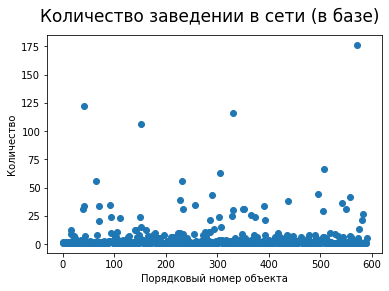

In [74]:
draw_scatter(df_chain['id'], 'Количество заведении в сети (в базе)')

In [75]:
print('Количество сетей (в базе) - ', df_chain.shape[0])
print('Количество заведений в сетях - ', df_chain['id'].sum())
print('Количество заведений в сети по медиане, исключая сети с 1 объектом - ', df_chain[~(df_chain['id']==1)]['id'].median())


Количество сетей (в базе) -  591
Количество заведений в сетях -  2968
Количество заведений в сети по медиане, исключая сети с 1 объектом -  4.0


In [76]:
print('Количество строк в таблице -',df_chain[df_chain['id']==1].shape[0])
df_chain[df_chain['id']==1].head()

Количество строк в таблице - 327


,object_name,object_type,id,number
1,Sабвей Sушивок,кафе,1,24.0
2,beverly hills diner,ресторан,1,88.0
3,bierloga,кафе,1,75.0
4,black white,кафе,1,40.0
5,bocconcino,кафе,1,36.0


In [77]:
table = df_chain.sort_values(by='id', ascending=False).reset_index().head(10)
table

,index,object_name,object_type,id,number
0,570,шоколадница,кафе,176,10050.0
1,41,kfc,предприятие быстрого обслуживания,122,7254.0
2,330,макдоналдс,предприятие быстрого обслуживания,116,10588.0
3,152,бургер кинг,предприятие быстрого обслуживания,106,4951.0
4,506,теремок,предприятие быстрого обслуживания,66,1899.0
5,305,крошка картошка,предприятие быстрого обслуживания,63,1438.0
6,64,starbucks,кафе,56,2354.0
7,232,доминос пицца,кафе,56,970.0
8,496,тануки,ресторан,44,4983.0
9,290,кофе хаус,кафе,43,2582.0


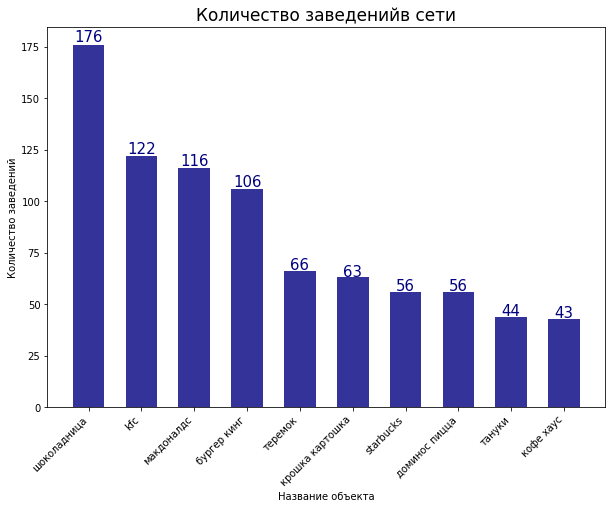

In [78]:
draw_bar(table, 'object_name', 'id', 
         'Количество заведенийв сети', 'Название объекта', 'Количество заведений')


<div style="border:solid navy 2px; padding: 20px">
Сеть состоящая из одного ресторана - не сеть. 322 сети представлены в базе 1 заведением. Исключаю их
Много заведений в сети для Москвы - это больше 5, в немиллионнике это могло быть 2. Мало - меньше 5.
</div>



In [79]:
chain_many = df_chain[df_chain['id']>4]
print('Количество сетей с 5 и более заведений - ', chain_many.shape[0])
chain = {}
chain['many']=chain_many.shape[0]

Количество сетей с 5 и более заведений -  112


In [80]:
chain_few = df_chain[(df_chain['id']>1) & (df_chain['id']<=4)]

print('Количество сетей с 2 - 4 заведениями - ', chain_few.shape[0])
chain['few'] = chain_few.shape[0]

Количество сетей с 2 - 4 заведениями -  152


In [81]:
chain= pd.Series(chain)
chain

many    112
few     152
dtype: int64

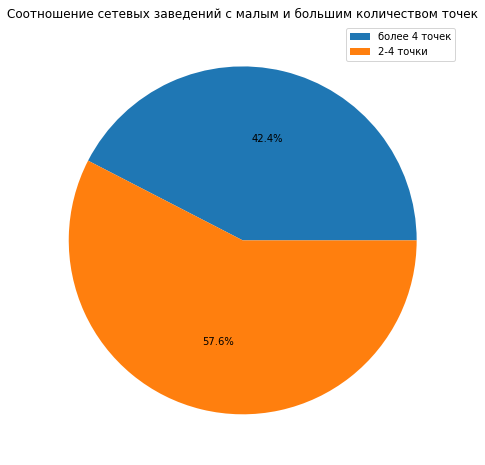

In [82]:
fig, ax = plt.subplots(subplot_kw=dict(aspect="equal"), figsize=(16,8))

wedges = ax.pie(chain, autopct='%1.1f%%')

ax.set_title("Соотношение сетевых заведений с малым и большим количеством точек")
ax.legend(['более 4 точек', '2-4 точки'])

plt.show()

/Users/Alexander/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Среднее количество посадочных мест в крупных сетях (median) - 33.47
Минимум - 0
Максимум - 166
Среднее - 49
Медиана - 33


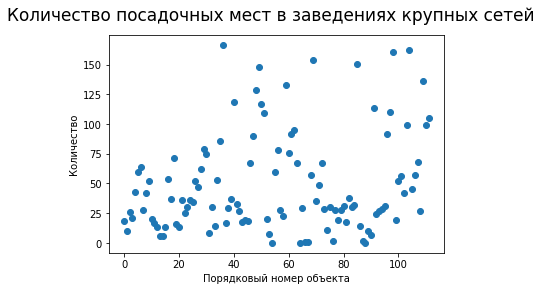

In [83]:
chain_many['number_mean'] = chain_many['number'] / chain_many['id']

print('Среднее количество посадочных мест в крупных сетях (median) - {:.2f}'.format(chain_many['number_mean'].median()))

draw_scatter(chain_many['number_mean'], 'Количество посадочных мест в заведениях крупных сетей')

/Users/Alexander/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Среднее количество посадочных мест в малообъектных сетях (median) - 39.83
Минимум - 0
Максимум - 217
Среднее - 56
Медиана - 40


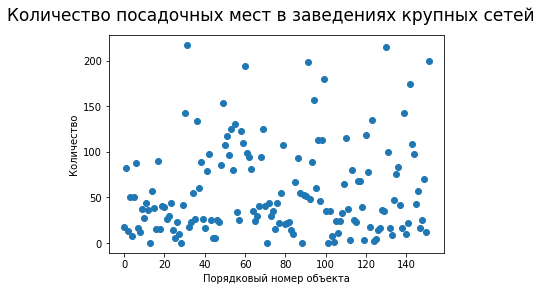

In [84]:
chain_few['number_mean'] = chain_few['number'] / chain_few['id']

print('Среднее количество посадочных мест в малообъектных сетях (median) - {:.2f}'.format(chain_few['number_mean'].median()))

draw_scatter(chain_few['number_mean'], 'Количество посадочных мест в заведениях крупных сетей')

In [85]:
print('Количество строк в таблице -',chain_many.shape[0])
chain_many.head()

Количество строк в таблице - 112


,object_name,object_type,id,number,number_mean
16,cofix,кафе,12,220.0,18.333333
17,cofix,кафетерий,9,92.0,10.222222
22,costa coffee,кафе,7,181.0,25.857143
25,dunkin donuts,кафе,5,104.0,20.800000
40,kfc,кафе,31,1332.0,42.967742


In [86]:
chain_many['group'] = 'many'
chain_few['group'] = 'few'

/Users/Alexander/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/Alexander/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [87]:
df4=pd.concat([chain_many, chain_few])
print('Количество строк в таблице -',df4.shape[0])
df4.head()

Количество строк в таблице - 264


,object_name,object_type,id,number,number_mean,group
16,cofix,кафе,12,220.0,18.333333,many
17,cofix,кафетерий,9,92.0,10.222222,many
22,costa coffee,кафе,7,181.0,25.857143,many
25,dunkin donuts,кафе,5,104.0,20.800000,many
40,kfc,кафе,31,1332.0,42.967742,many


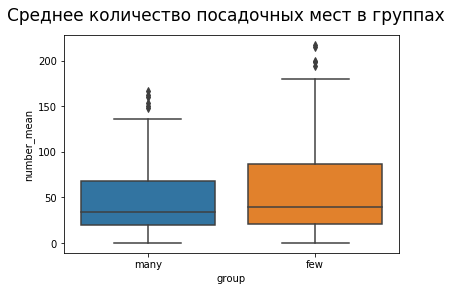

In [88]:
draw_boxplot(df4["group"], df4["number_mean"], 'Среднее количество посадочных мест в группах')


<div style="border:solid navy 2px; padding: 20px">
Н0: Среднее количество посадочных мест в выборках совпадает.
    
Н1: Среднее количество посадочных мест в выборках отличается.
</div>



In [89]:
alpha = .05 # критический уровень статистической значимости

results = st.shapiro(chain_few['number_mean'])
p_value = results[1] # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: распределение не нормально")
else:
    print("Не получилось отвергнуть нулевую гипотезу, всё нормально")

p-значение:  4.6539277986923366e-10
Отвергаем нулевую гипотезу: распределение не нормально


In [90]:
results = st.shapiro(chain_many['number_mean'])
p_value = results[1] # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: распределение не нормально")
else:
    print("Не получилось отвергнуть нулевую гипотезу, всё нормально")

p-значение:  3.234180567801559e-08
Отвергаем нулевую гипотезу: распределение не нормально


In [91]:
alpha = .05 # критический уровень статистической значимости

results = st.mannwhitneyu(chain_few['number_mean'], chain_many['number_mean'])

print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

p-значение:  0.23649394500763787
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя



<div style="border:solid navy 2px; padding: 20px">
Получаем, что для сетевых заведений наиболее характерно мало заведений.
Но здесь нужно учесть, что не все проблемы с названиями сетей решены и остались неучтенные заведения в некоторых сетях.
Количество посадочных в крупных и мелких сетях примерно одинаковое.

</div>




<div style="border:solid navy 2px; padding: 20px">
Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики.
</div>



In [92]:
df_number = df.groupby('object_type')['number'].median().reset_index()
df_number = df_number.sort_values('number', ascending=False)
df_number

,object_type,number
8,столовая,104.5
7,ресторан,80.0
0,бар,35.0
3,кафе,35.0
1,буфет,32.0
4,кафетерий,9.0
6,предприятие быстрого обслуживания,5.0
2,закусочная,0.0
5,магазин (отдел кулинарии),0.0


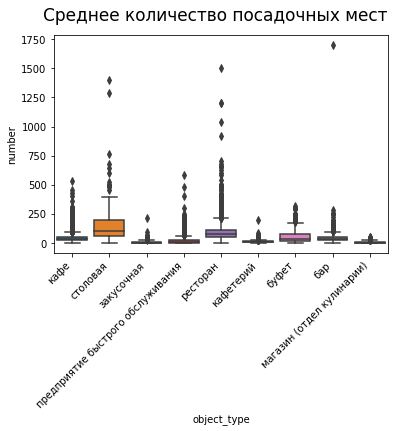

In [93]:
draw_boxplot(df['object_type'], df['number'], 'Среднее количество посадочных мест')


<div style="border:solid navy 2px; padding: 20px">
Выделите в отдельный столбец информацию об улице из столбца address .
</div>




<div style="border:solid navy 2px; padding: 20px">
Работа с API
</div>




<div style="border:solid navy 2px; padding: 20px">
Выделяем улицу и район
</div>



In [94]:
df.head()

,id,object_name,chain,object_type,address,number
0,151635,сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48.0
1,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35.0
2,24309,академия,False,кафе,"город Москва, Абельмановская улица, дом 6",95.0
3,21894,пиццетория,True,кафе,"город Москва, Абрамцевская улица, дом 1",40.0
4,119365,вишневая метель,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50.0



<div style="border:solid navy 2px; padding: 20px">
  
Следующая ячейка выполняется примеро 2 часа
</div>



In [ ]:
 for i in range(df.shape[0]):
    try:
        BASE_URL = 'https://geocode-maps.yandex.ru/1.x/?format=json&apikey=9d746bb0-a05e-46e3-8d78-7cf020d32559&geocode='
        BASE_URL = BASE_URL + df.loc[i,'address']

        response = requests.get(BASE_URL) # шлём запрос
        response_parsed = json.loads(response.text)# сохраняем ответ
        street = response_parsed['response']['GeoObjectCollection']['featureMember'][0]\
            ['GeoObject']['metaDataProperty']['GeocoderMetaData']['Address']['Components'][4]\
            ['name'] # Получаем улицу

        point = response_parsed['response']['GeoObjectCollection']['featureMember'][0]\
            ['GeoObject']['Point']['pos'] # Получаем улицу точку на картах

            # тут по точке получаем район
        BASE_URL_reverse = 'https://geocode-maps.yandex.ru/1.x/?format=json&apikey=9d746bb0-a05e-46e3-8d78-7cf020d32559&geocode='
        BASE_URL_reverse = BASE_URL_reverse + point.replace(' ',',')# приводим к нужному виду точку на карте
        response = requests.get(BASE_URL_reverse)
        response_parsed_reverse = json.loads(response.text)

        district = response_parsed_reverse['response']['GeoObjectCollection']['featureMember'][2]\
            ['GeoObject']['metaDataProperty']['GeocoderMetaData']['Address']['Components'][5]\
            ['name'] # Получаем район

        df.iloc[i,'street'] = street
        df.iloc[i,'district'] = district

    except:
        df.loc[i,'street'] = 'nan'
        df.loc[i,'district'] = 'nan'

In [1588]:
df['street'].value_counts()

проспект Мира             203
Профсоюзная улица         175
Пресненская набережная    167
Ленинградский проспект    166
Варшавское шоссе          162
                         ... 
Мажоров переулок            1
улица Саляма Адиля          1
Тургеневская площадь        1
Тетеринский переулок        1
улица Льва Яшина            1
Name: street, Length: 1797, dtype: int64


<div style="border:solid navy 2px; padding: 20px">
Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
</div>



In [1589]:
df=df[~(df['street']=='nan')]

In [1590]:
df_street = df.groupby(['street', 'district']).agg({'id':'count', 'number':'median'}).reset_index()

In [1592]:
df_street_sort = df_street.sort_values(by='id', ascending = False).head(10).reset_index()
df_street_sort

,index,street,district,id,number
0,1101,Пресненская набережная,Пресненский район,167,30.0
1,1414,Ходынский бульвар,Хорошёвский район,102,41.0
2,2016,улица Новый Арбат,район Арбат,92,43.5
3,2133,улица Сущёвский Вал,район Марьина Роща,82,10.0
4,1135,Пятницкая улица,район Замоскворечье,80,46.5
5,658,Кировоградская улица,район Чертаново Центральное,79,24.0
6,1721,улица Арбат,район Арбат,77,48.0
7,747,Ленинградское шоссе,Войковский район,72,30.0
8,1852,улица Земляной Вал,Басманный район,69,35.0
9,1326,Тверская улица,Тверской район,68,61.0


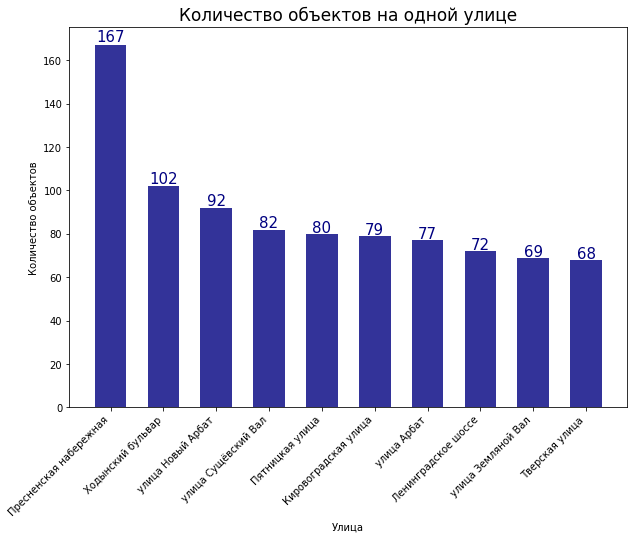

In [1593]:
draw_bar(df_street_sort, 'street', 'id', 
         'Количество объектов на одной улице', 'Улица', 'Количество объектов')

In [1594]:
df_street_sort['district'].unique()

array(['Пресненский район', 'Хорошёвский район', 'район Арбат',
       'район Марьина Роща', 'район Замоскворечье',
       'район Чертаново Центральное', 'Войковский район',
       'Басманный район', 'Тверской район'], dtype=object)

In [1595]:
df_district = df.groupby('district').agg({'id':'count', 'number':'median'}).reset_index()
df_district_sort = df_district.sort_values(by='id', ascending = False).head(10).reset_index()
df_district_sort

,index,district,id,number
0,30,Тверской район,770,50.0
1,26,Пресненский район,720,40.0
2,4,Басманный район,503,40.0
3,11,Даниловский район,401,25.0
4,219,район Хамовники,365,40.0
5,29,Таганский район,354,50.0
6,18,Мещанский район,351,41.0
7,161,район Замоскворечье,335,41.0
8,145,район Арбат,271,44.0
9,33,Хорошёвский район,258,32.0


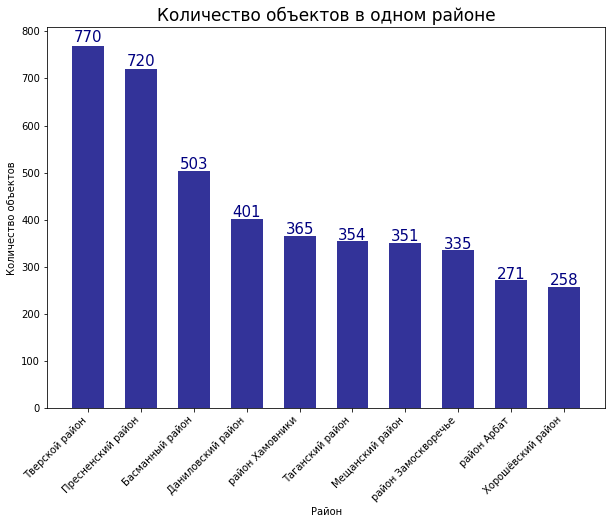

In [1596]:
draw_bar(df_district_sort, 'district', 'id', 
         'Количество объектов в одном районе', 'Район', 'Количество объектов')


<div style="border:solid navy 2px; padding: 20px">
    Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?
</div>



In [1597]:
df_street_sort2 = df_street[df_street['id']==1]
df_street_sort2[['street', 'district', 'id']]

,street,district,id
2,1-й Балтийский переулок,район Аэропорт,1
3,1-й Басманный переулок,Красносельский район,1
4,1-й Ботанический проезд,район Свиблово,1
7,1-й Вешняковский проезд,Рязанский район,1
9,1-й Голутвинский переулок,район Якиманка,1
...,...,...,...
2174,улица Шумкина,район Сокольники,1
2176,улица Шухова,Донской район,1
2179,улица Щорса,район Солнцево,1
2185,шоссе Фрезер,Нижегородский район,1


In [1598]:
center_district_list = ['район Арбат', 'Басманный район', 'район Замоскворечье', 'Красносельский район', 
                        'Мещанский район', 'Пресненский район', 'Таганский район', 'Тверской район', 
                        'район Хамовники', 'район Якиманка']
 

In [1599]:
# улицы в центре с 1 заведением
df_1_center = df_street_sort2[df_street_sort2['district'].isin(center_district_list)]
df_1_center

,street,district,id,number
3,1-й Басманный переулок,Красносельский район,1,50.0
9,1-й Голутвинский переулок,район Якиманка,1,22.0
13,1-й Зачатьевский переулок,район Хамовники,1,50.0
17,1-й Коптельский переулок,Красносельский район,1,45.0
18,1-й Котельнический переулок,Таганский район,1,35.0
...,...,...,...,...
2014,улица Новая Дорога,Басманный район,1,60.0
2048,улица Подвойского,Пресненский район,1,200.0
2092,улица Савельева,район Хамовники,1,100.0
2132,улица Сущёвский Вал,Тверской район,1,40.0


In [1600]:
df_street_1 = df_street_sort2.groupby('district').agg({'id':'count'}).sort_values(by='id',ascending=False).reset_index()
df_street_1_top = df_street_1.head(10)
df_street_1_top

,district,id
0,Таганский район,28
1,район Хамовники,27
2,Тверской район,23
3,Пресненский район,22
4,Басманный район,21
5,район Марьина Роща,19
6,район Лефортово,13
7,район Замоскворечье,12
8,Красносельский район,12
9,район Богородское,12


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



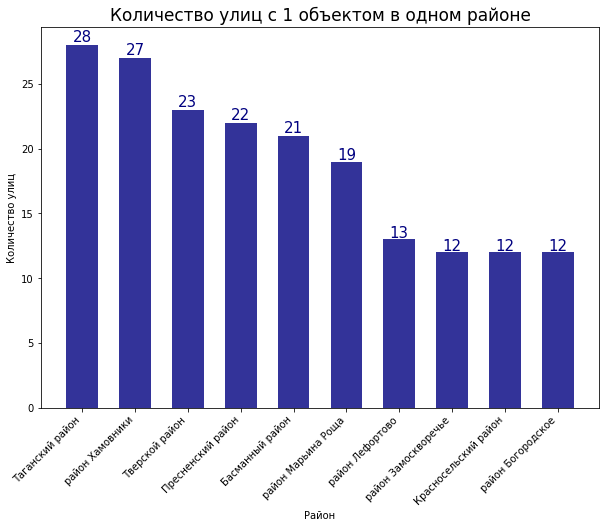

In [1601]:
draw_bar(df_street_1_top, 'district', 'id', 
         'Количество улиц с 1 объектом в одном районе', 'Район', 'Количество улиц')


<div style="border:solid navy 2px; padding: 20px">
  
Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?
</div>



In [1602]:
 # список top-10 улиц
list_street = df_street_sort['street'].unique()
list_street

array(['Пресненская набережная', 'Ходынский бульвар', 'улица Новый Арбат',
       'улица Сущёвский Вал', 'Пятницкая улица', 'Кировоградская улица',
       'улица Арбат', 'Ленинградское шоссе', 'улица Земляной Вал',
       'Тверская улица'], dtype=object)

In [1603]:
# df, включающий только улицы из top-10
df_top_count = df[df['street'].isin(list_street)]
df_top_count

,id,object_name,chain,object_type,address,number,street,district
36,127979,месопотамия,False,ресторан,"город Москва, улица Арбат, дом 4, строение 1",50,улица Арбат,район Арбат
37,24968,му му,True,кафе,"город Москва, улица Арбат, дом 4, строение 1",125,улица Арбат,район Арбат
38,127980,хлеб насущный,True,кафе,"город Москва, улица Арбат, дом 6/2",20,улица Арбат,район Арбат
39,88194,tajj mahal,True,ресторан,"город Москва, улица Арбат, дом 6/2",100,улица Арбат,район Арбат
40,107496,калифорния дайнер,False,кафе,"город Москва, улица Арбат, дом 23, строение 1",150,улица Арбат,район Арбат
...,...,...,...,...,...,...,...,...
15091,215646,ливан хаус,True,кафе,"город Москва, Ходынский бульвар, дом 4",41,Ходынский бульвар,Хорошёвский район
15151,215522,lavkalavka,True,кафе,"город Москва, Ходынский бульвар, дом 4",41,Ходынский бульвар,Хорошёвский район
15165,218394,cofix,True,кафетерий,"город Москва, Ленинградское шоссе, дом 16А, ст...",12,Ленинградское шоссе,Войковский район
15167,215276,cofix,True,кафе,"город Москва, Ходынский бульвар, дом 4",41,Ходынский бульвар,Хорошёвский район


Минимум - 0
Максимум - 480
Среднее - 52
Медиана - 40


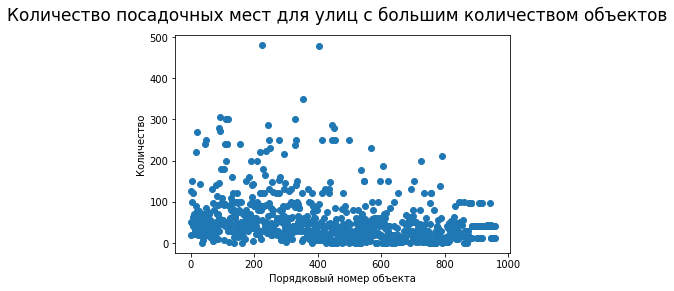

In [1604]:
draw_scatter(df_top_count['number'], 
             'Количество посадочных мест для улиц с большим количеством объектов')

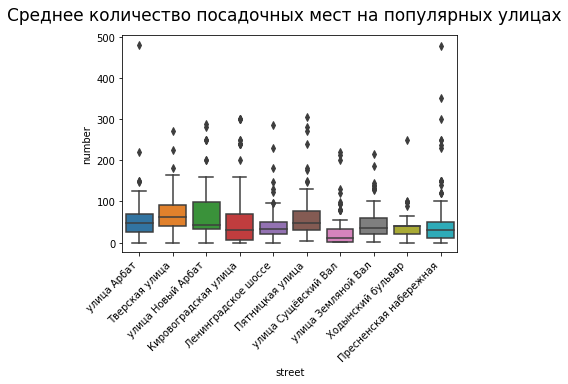

In [1605]:
draw_boxplot(df_top_count['street'], df_top_count['number'], 'Среднее количество посадочных мест на популярных улицах')

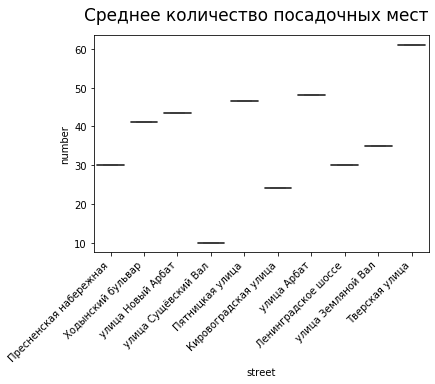

In [1606]:
draw_boxplot(df_street_sort['street'], df_street_sort['number'], 'Среднее количество посадочных мест')

In [1607]:
print('Среднее количество посадочных мест на популярных улицах', df_top_count['number'].mean())
print('Количество посадочных мест на популярных улицах по медиане', df_top_count['number'].median())


Среднее количество посадочных мест на популярных улицах 52.4625
Количество посадочных мест на популярных улицах по медиане 40.0


In [1608]:
# эта же величина, высчитанная другим путем 
print('Среднее количество посадочных мест', df_street_sort['number'].median())

Среднее количество посадочных мест 38.0


In [1609]:
district_group = df.groupby('district').agg({'street':'nunique', 'id':'count', 
                                             'number':'median'}).reset_index()
district_group.columns=['district', 'street_count', 'id_count', 'number_median']
district_group['number_median'] = district_group['number_median'].astype(int)
# Среднее количество посадочных мест в заведениях района
#district_group['number'] = (district_group['number'] / district_group['id']).astype(int)
# Среднее количество заведений на 1 улицу
district_group['obj_on_street'] = (district_group['id_count'] / district_group['street_count']).astype(int)

district_group = district_group.sort_values(by='id_count',ascending=False)
district_group.head(15)

,district,street_count,id_count,number_median,obj_on_street
30,Тверской район,92,770,50,8
26,Пресненский район,86,720,40,8
4,Басманный район,67,503,40,7
11,Даниловский район,48,401,25,8
219,район Хамовники,72,365,40,5
29,Таганский район,77,354,50,4
18,Мещанский район,42,351,41,8
161,район Замоскворечье,38,335,41,8
145,район Арбат,32,271,44,8
33,Хорошёвский район,23,258,32,11


Минимум - 1
Максимум - 92
Среднее - 9
Медиана - 3


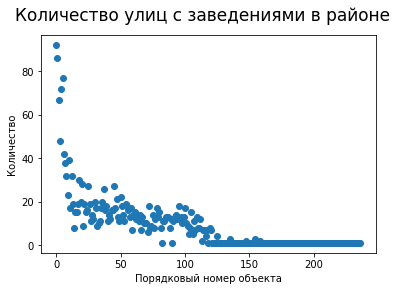

In [1610]:
draw_scatter(district_group['street_count'], 
             'Количество улиц с заведениями в районе')

In [1611]:
# выбираем крупные районы
district_group = district_group[district_group['street_count']>10]
district_group = district_group.sort_values(by='obj_on_street',ascending=False).reset_index()
district_group=district_group.head(20)
district_group[['district','obj_on_street']]

,district,obj_on_street
0,район Марьино,12
1,Хорошёвский район,11
2,Академический район,11
3,район Митино,11
4,район Нагатино-Садовники,11
5,район Раменки,10
6,район Коньково,10
7,Войковский район,10
8,район Филёвский Парк,10
9,район Чертаново Южное,9


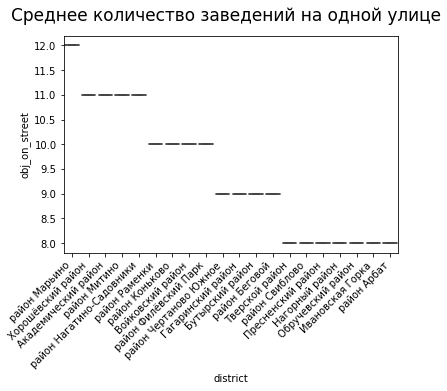

In [1612]:
draw_boxplot(district_group['district'], district_group['obj_on_street'], 
             'Среднее количество заведений на одной улице')



<div style="border:solid navy 2px; padding: 20px">
  
Сделайте общий вывод и дайте рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментируйте возможность развития сети.
</div>




<div style="border:solid navy 2px; padding: 20px">
  
Кафе - наиболее распространенный вид заведения общественного питания, лишь 23% являются сетевыми. Наиболее развитые сетевые заведения имеют более 100 объектов в Москве. 57% сетевых заведений имеют от 2 до 4 объектов. 

Количество посадочных мест в крупных сетях (более 5 объектов) - 34. Если рассматривать более крупные сети, это количество уменьшится. В мелких сетях в среднем 41 посадочное место.

В центральном округе есть 178 улиц с 1 заведением. Стоит их рассмотреть при поиске места расположения. В других районах также есть улицы с малым количеством заведений. Возможно развитие сети.
</div>

